##**BMI Prediction**

**Importing Libraries**

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.simplefilter('ignore')

**Data Preprocesing**

In [82]:
df = pd.read_csv('bmi.csv')
df.head(5)

,Age,Height,Weight,Bmi,BmiClass
0,61,1.85,109.30,31.935720,Obese Class 1
1,60,1.71,79.02,27.023700,Overweight
2,60,1.55,74.70,31.092612,Obese Class 1
3,60,1.46,35.90,16.841809,Underweight
4,60,1.58,97.10,38.896010,Obese Class 2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       741 non-null    int64  
 1   Height    741 non-null    float64
 2   Weight    741 non-null    float64
 3   Bmi       741 non-null    float64
 4   BmiClass  741 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 29.1+ KB


In [6]:
df.describe()

,Age,Height,Weight,Bmi
count,741.000000,741.000000,741.000000,741.000000
mean,31.618084,1.709427,78.412497,26.365427
std,11.655466,0.085974,32.254547,9.223191
min,15.000000,1.460000,25.900000,12.150497
25%,22.000000,1.670000,63.000000,22.129740
50%,29.000000,1.721000,72.900000,24.132412
75%,40.000000,1.751000,83.300000,27.249306
max,61.000000,2.070000,270.000000,66.301350


In [7]:
df.median()

<ipython-input-7-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


Age       29.000000
Height     1.721000
Weight    72.900000
Bmi       24.132412
dtype: float64

In [8]:
df.skew()

<ipython-input-8-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Age       0.578546
Height   -0.390655
Weight    2.005903
Bmi       1.717363
dtype: float64

In [10]:
df.isnull().sum()

Age         0
Height      0
Weight      0
Bmi         0
BmiClass    0
dtype: int64

In [12]:
df.columns

Index(['Age', 'Height', 'Weight', 'Bmi', 'BmiClass'], dtype='object')

In [14]:
df['BmiClass'].value_counts().unique

<bound method Series.unique of Normal Weight    342
Overweight       166
Underweight       96
Obese Class 3     62
Obese Class 2     55
Obese Class 1     20
Name: BmiClass, dtype: int64>

In [11]:
df.shape

(741, 5)

**Exploratory Data Analysis**

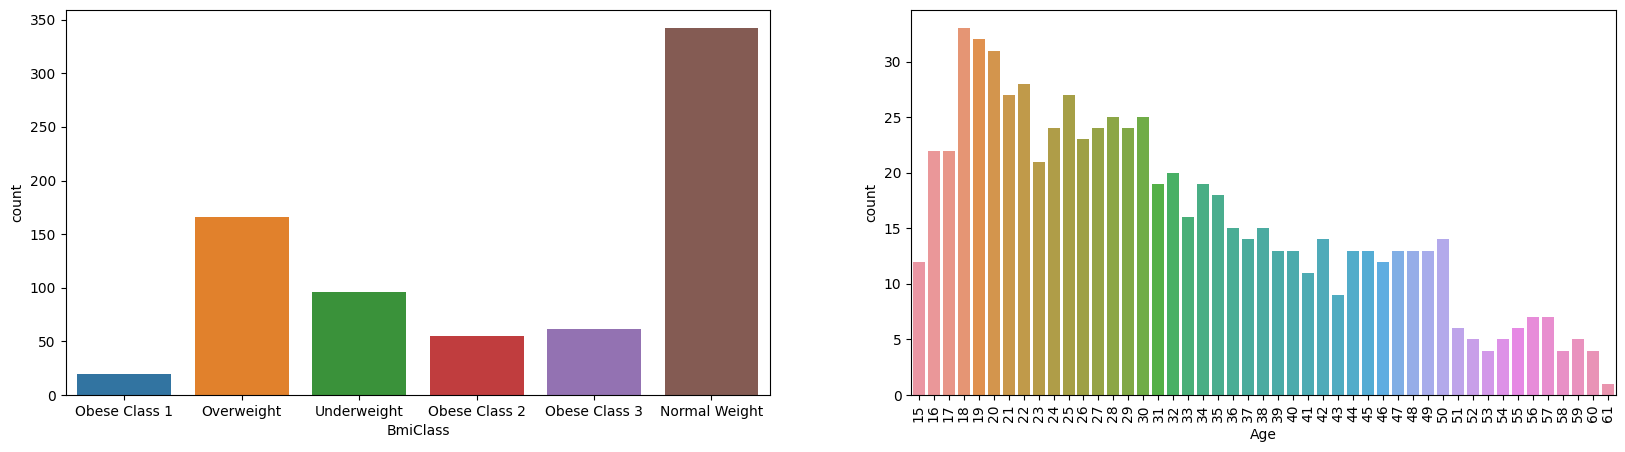

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
sns.countplot(data = df, x = 'BmiClass',ax =ax[0])
sns.countplot(data = df, x = 'Age', ax =ax[1])
plt.xticks(rotation=90)
plt.show()

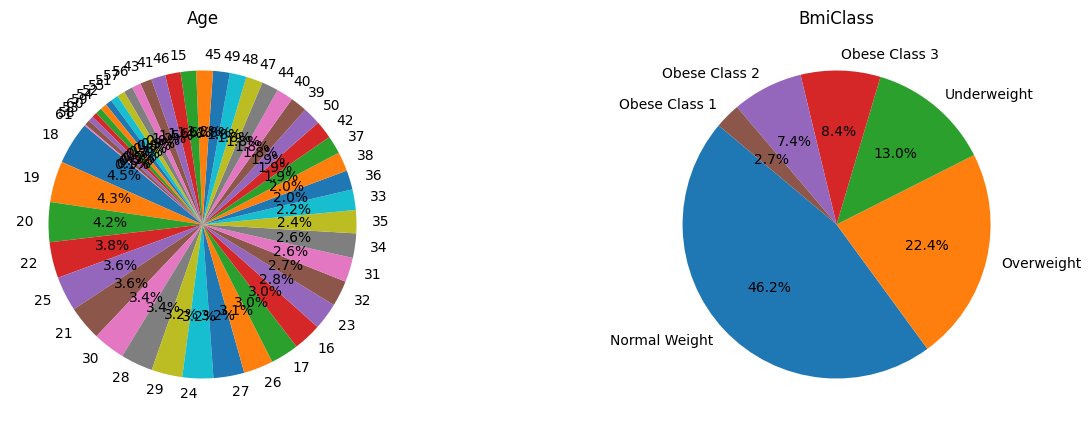

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].pie(df['Age'].value_counts(), labels=df['Age'].value_counts().index, autopct='%1.1f%%', startangle=140)
ax[0].set_title('Age')

ax[1].pie(df['BmiClass'].value_counts(), labels=df['BmiClass'].value_counts().index, autopct='%1.1f%%', startangle=140)
ax[1].set_title('BmiClass')

plt.show()

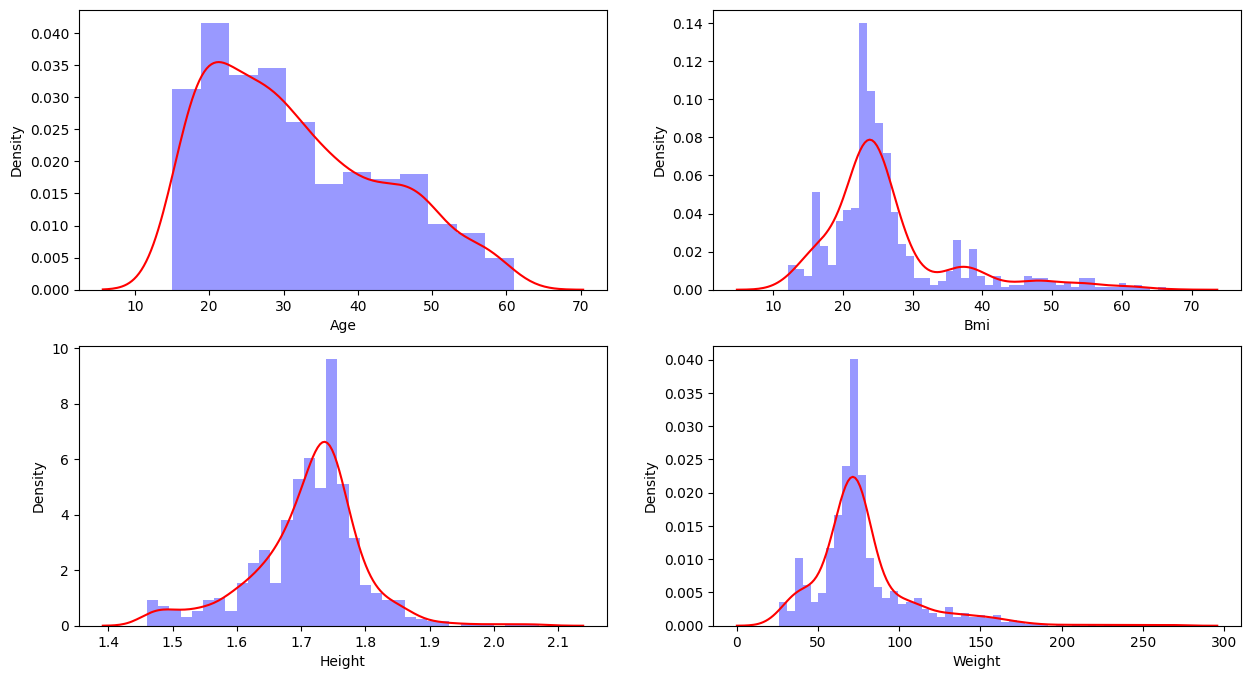

In [26]:
fig, ax = plt.subplots(2, 2, figsize=(15, 8))
sns.distplot( df['Age'],kde = True,ax =ax[0,0],color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['Bmi'], kde = True, ax =ax[0,1],color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['Height'],kde = True,ax =ax[1,0],color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['Weight'], kde = True,ax =ax[1,1],color = 'red', hist_kws={'color': 'blue'})
plt.show()

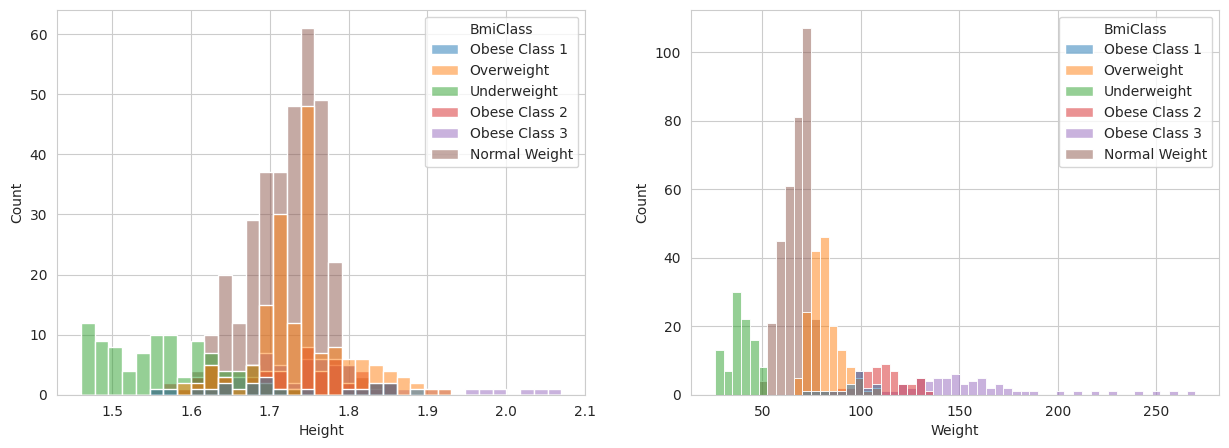

In [71]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data = df, x = 'Height', hue = 'BmiClass', ax=ax[0])
sns.histplot(data = df, x = 'Weight', hue = 'BmiClass', ax=ax[1])

plt.show()

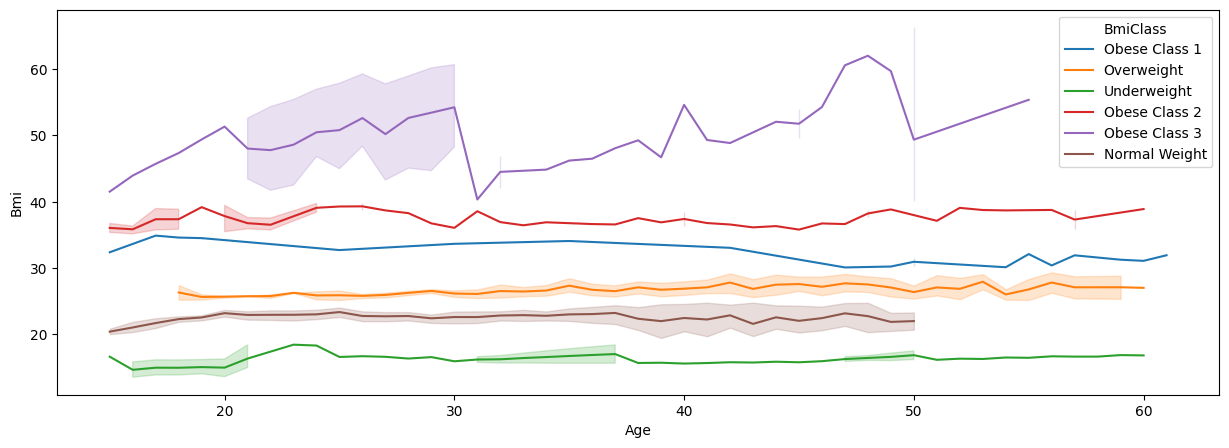

In [49]:
plt.figure(figsize = (15,5))
sns.lineplot(data = df, x = 'Age', y = 'Bmi', hue ='BmiClass')
plt.show()

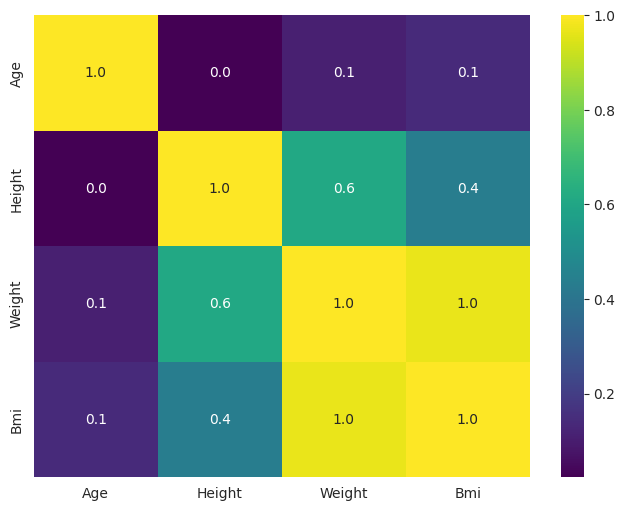

In [70]:
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(), annot = True, fmt = '.1f', cmap = 'viridis')
plt.show()

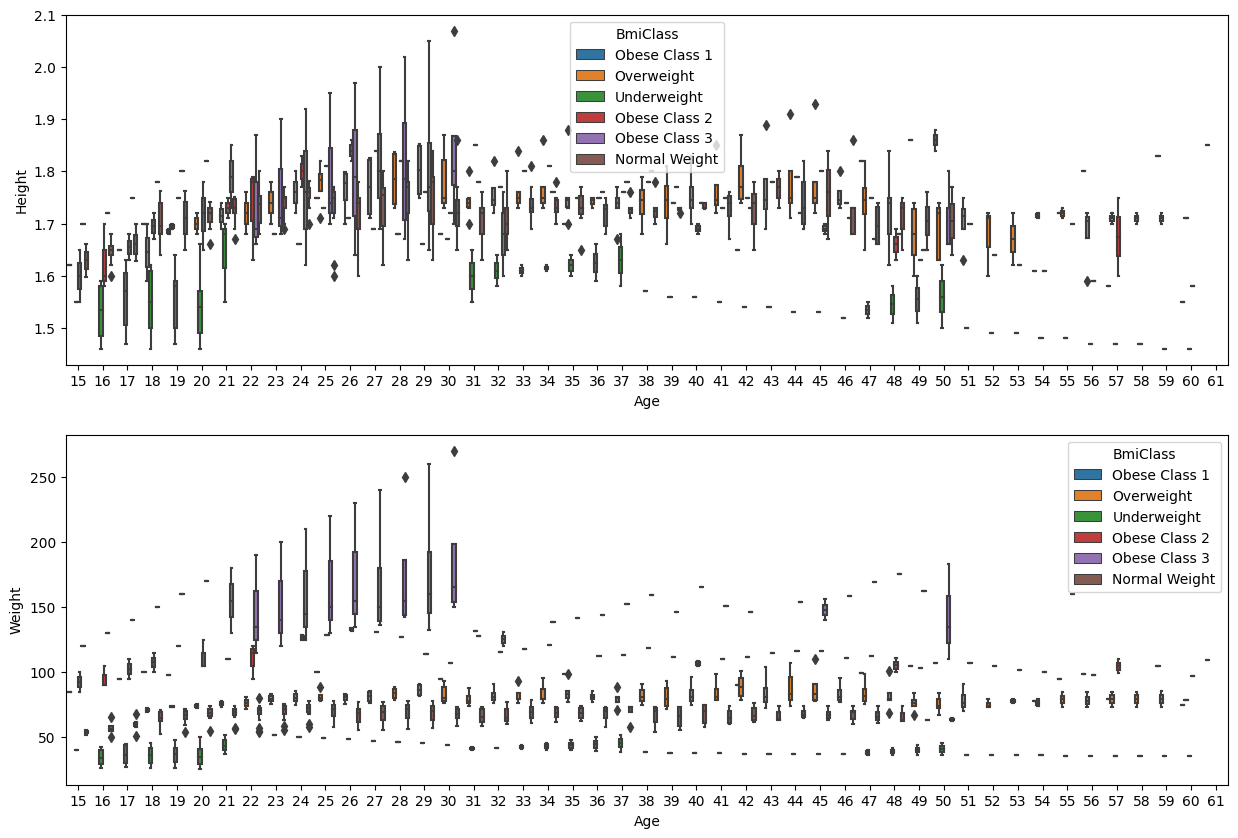

In [43]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))

sns.boxplot(data=df, x='Age', y='Height', hue ='BmiClass', ax = ax[0])
sns.boxplot(data=df, x='Age', y='Weight', hue ='BmiClass', ax = ax[1])

plt.show()

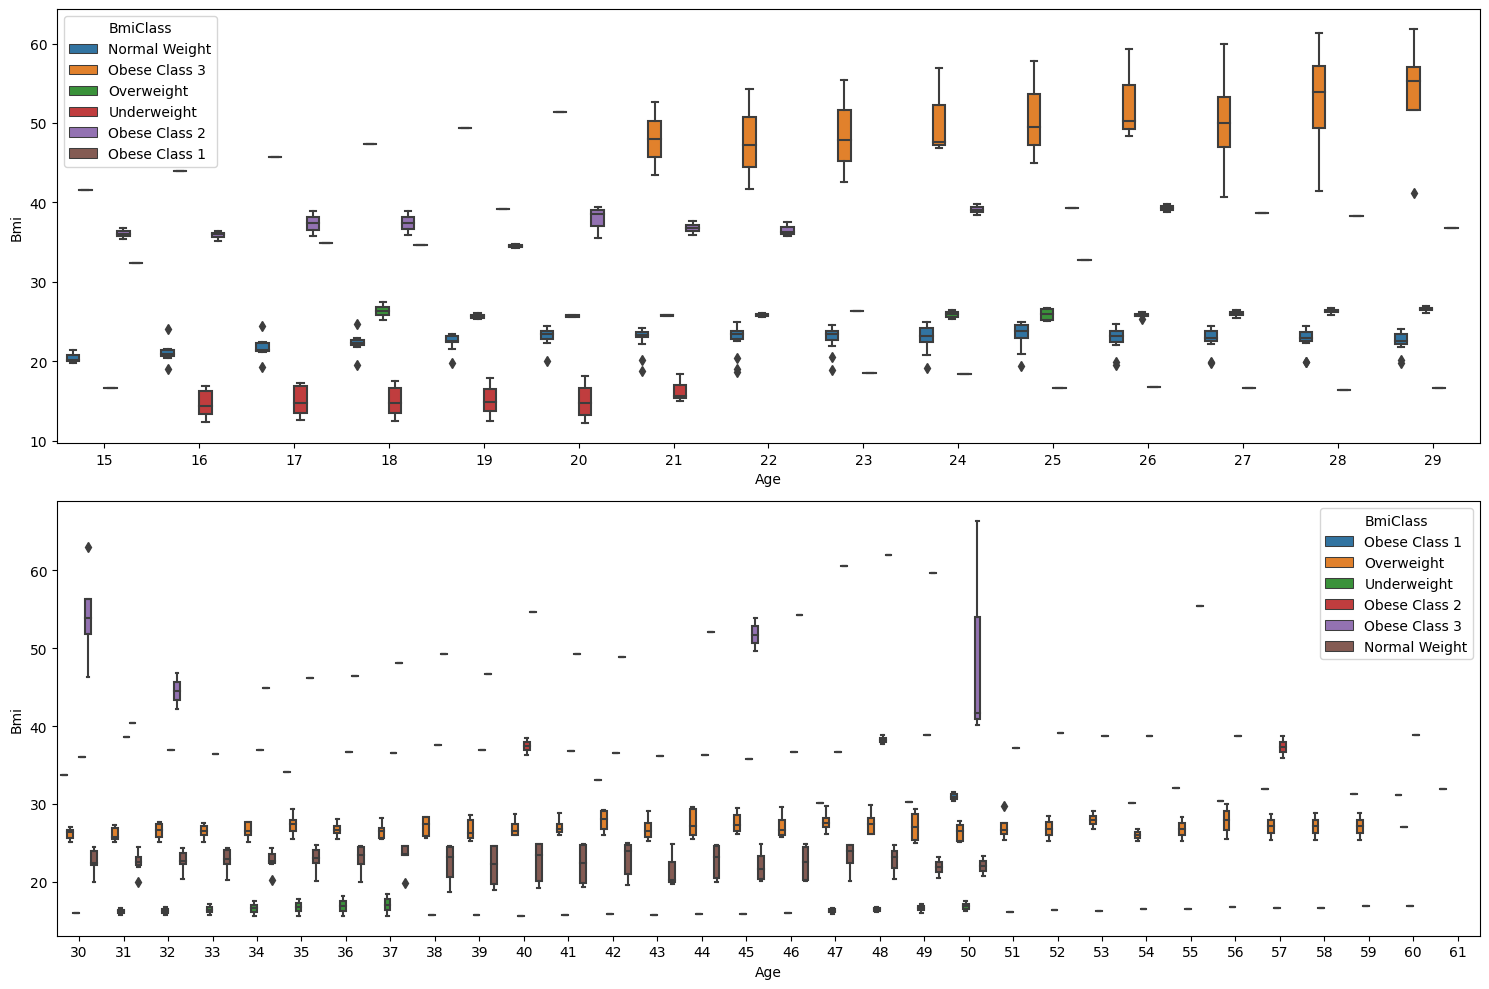

In [39]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))

sns.boxplot(data=df[df['Age'] <= df['Age'].median()], x='Age', y='Bmi', hue='BmiClass', ax=ax[0])
sns.boxplot(data=df[df['Age'] > df['Age'].median()], x='Age', y='Bmi', hue='BmiClass', ax=ax[1])
plt.grid(False)
plt.tight_layout()
plt.show()

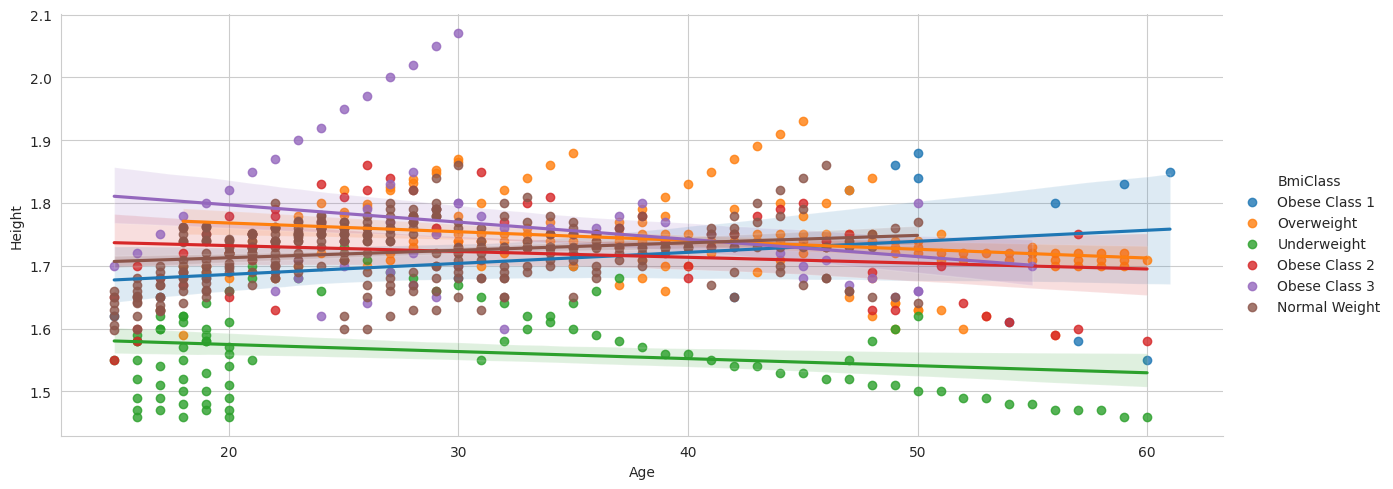

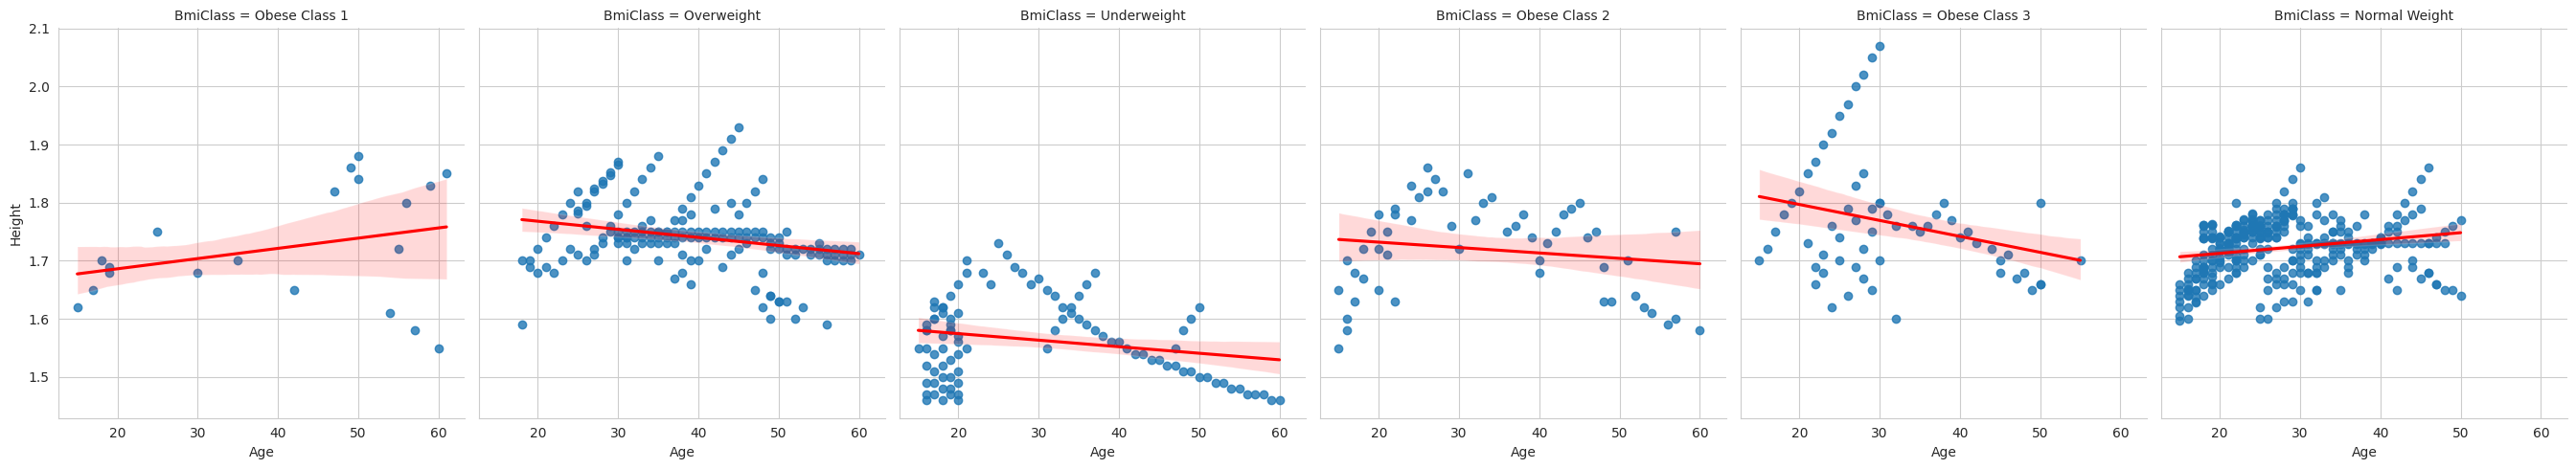

In [73]:
sns.lmplot(data=df, x='Age', y='Height', hue='BmiClass', aspect=2.5)
sns.lmplot(data=df, x='Age', y='Height', col ='BmiClass', aspect=0.9, line_kws={'color': 'red'})

plt.show()

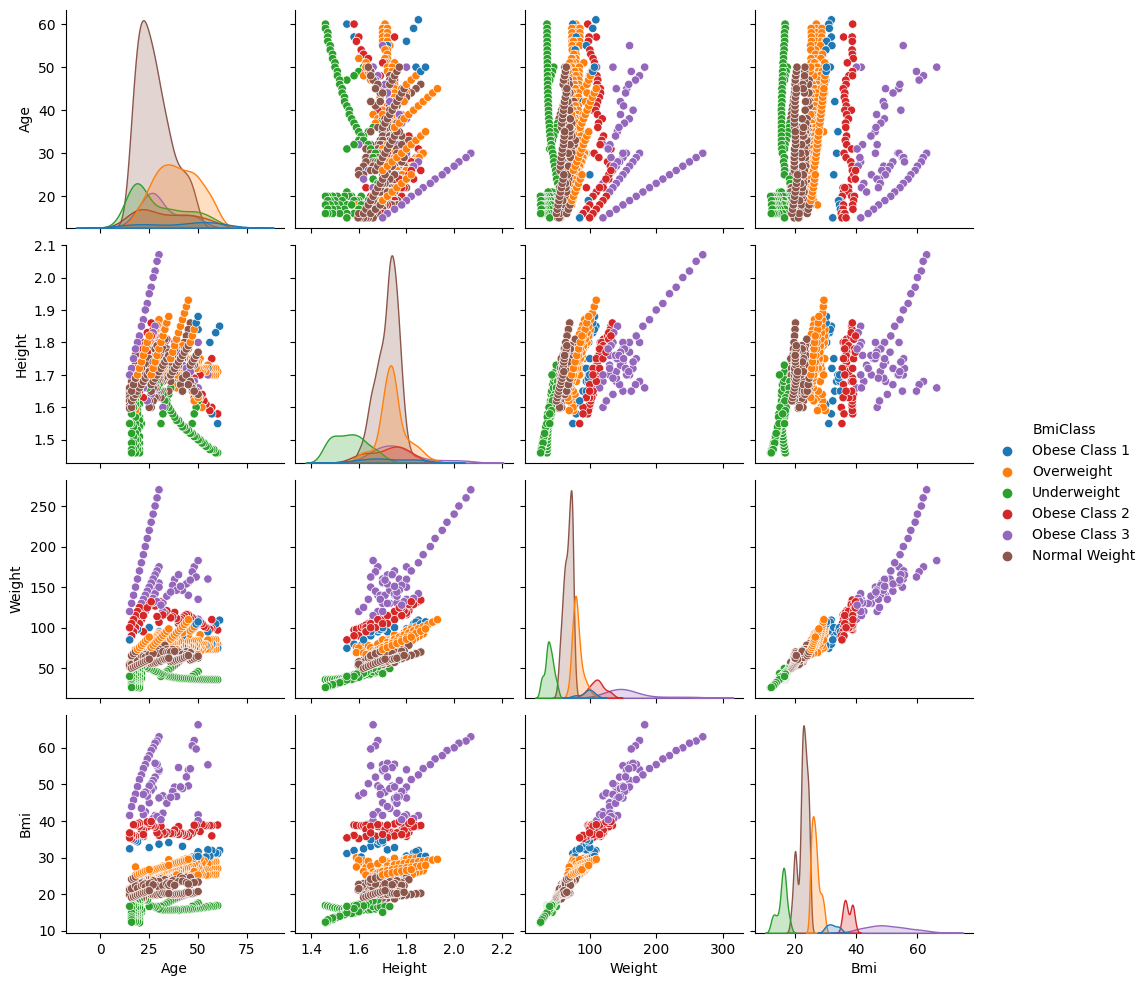

In [4]:
sns.pairplot(df, hue = 'BmiClass')

**Encoder**

In [83]:
lb = LabelEncoder()

df['BmiClass'] = lb.fit_transform(df['BmiClass'])

df.head(1)

,Age,Height,Weight,Bmi,BmiClass
0,61,1.85,109.3,31.93572,1


**Modeling and Evaluation**

In [85]:
X_M = df.drop('BmiClass', axis = 1)
Y_M = df['BmiClass']
scaler = MinMaxScaler()
x = scaler.fit_transform(X_M)

**Train Test Split**

In [87]:
X_train, X_test, y_train, y_test = train_test_split(x, Y_M, test_size=0.3, random_state=42)

**Logistic Regression**

In [88]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
logistic_model.score(X_train, y_train)
model_pred_L = logistic_model.predict(X_test)

print(classification_report(y_test, model_pred_L))
print("accuracy: ",accuracy_score(y_test, model_pred_L))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_L))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_L))

              precision    recall  f1-score   support

           0       0.68      0.99      0.80       101
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00        13
           3       0.86      1.00      0.93        19
           4       0.68      0.44      0.53        57
           5       1.00      0.59      0.74        27

    accuracy                           0.72       223
   macro avg       0.54      0.50      0.50       223
weighted avg       0.67      0.72      0.67       223

accuracy:  0.7174887892376681
mean_absolute_error:  1.0044843049327354
mean_squared_error:  3.9641255605381165


**Random Forest Classifier**

In [94]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
random_forest_model.score(X_train, y_train)
model_pred_R = random_forest_model.predict(X_test)

print(classification_report(y_test, model_pred_R))
print("accuracy: ",accuracy_score(y_test, model_pred_R))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_R))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_R))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       0.83      0.83      0.83         6
           2       1.00      0.92      0.96        13
           3       0.95      1.00      0.97        19
           4       0.98      0.98      0.98        57
           5       1.00      1.00      1.00        27

    accuracy                           0.99       223
   macro avg       0.96      0.96      0.96       223
weighted avg       0.99      0.99      0.99       223

accuracy:  0.9865470852017937
mean_absolute_error:  0.03139013452914798
mean_squared_error:  0.08520179372197309


**Decision Tree**

In [95]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
decision_tree_model.score(X_train, y_train)
model_pred_T = decision_tree_model.predict(X_test)

print(classification_report(y_test, model_pred_T))
print("accuracy: ",accuracy_score(y_test, model_pred_T))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_T))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_T))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       0.86      1.00      0.92         6
           2       1.00      0.92      0.96        13
           3       0.95      1.00      0.97        19
           4       1.00      0.98      0.99        57
           5       1.00      1.00      1.00        27

    accuracy                           0.99       223
   macro avg       0.97      0.98      0.97       223
weighted avg       0.99      0.99      0.99       223

accuracy:  0.9910313901345291
mean_absolute_error:  0.017937219730941704
mean_squared_error:  0.04484304932735426


**SVC**

In [96]:
model_SVC = SVC(kernel = 'linear' ,random_state = 42)
model_SVC.fit(X_train, y_train)
model_SVC.score(X_train, y_train)
model_SVC_Pred = model_SVC.predict(X_test)

print(classification_report(y_test, model_SVC_Pred))
print("accuracy: ",accuracy_score(y_test, model_SVC_Pred))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_SVC_Pred))
print("mean_squared_error: ",mean_squared_error(y_test, model_SVC_Pred))

              precision    recall  f1-score   support

           0       0.78      0.99      0.87       101
           1       0.00      0.00      0.00         6
           2       0.68      1.00      0.81        13
           3       1.00      0.79      0.88        19
           4       0.87      0.60      0.71        57
           5       1.00      0.78      0.88        27

    accuracy                           0.82       223
   macro avg       0.72      0.69      0.69       223
weighted avg       0.82      0.82      0.80       223

accuracy:  0.820627802690583
mean_absolute_error:  0.6457399103139013
mean_squared_error:  2.5829596412556053


**KNeighborsClassifier**

In [97]:
model_NEG = KNeighborsClassifier(n_neighbors=5)
model_NEG.fit(X_train, y_train)
model_NEG.score(X_train, y_train)
model_NEG_Pred = model_NEG.predict(X_test)

print(classification_report(y_test, model_NEG_Pred))
print("accuracy: ",accuracy_score(y_test, model_NEG_Pred))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_NEG_Pred))
print("mean_squared_error: ",mean_squared_error(y_test, model_NEG_Pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       101
           1       1.00      0.17      0.29         6
           2       0.65      1.00      0.79        13
           3       1.00      0.84      0.91        19
           4       0.95      0.91      0.93        57
           5       0.96      0.93      0.94        27

    accuracy                           0.92       223
   macro avg       0.92      0.80      0.80       223
weighted avg       0.93      0.92      0.91       223

accuracy:  0.9192825112107623
mean_absolute_error:  0.23766816143497757
mean_squared_error:  0.9103139013452914


0    101
4     57
5     27
3     19
2     13
1      6
Name: BmiClass, dtype: int64


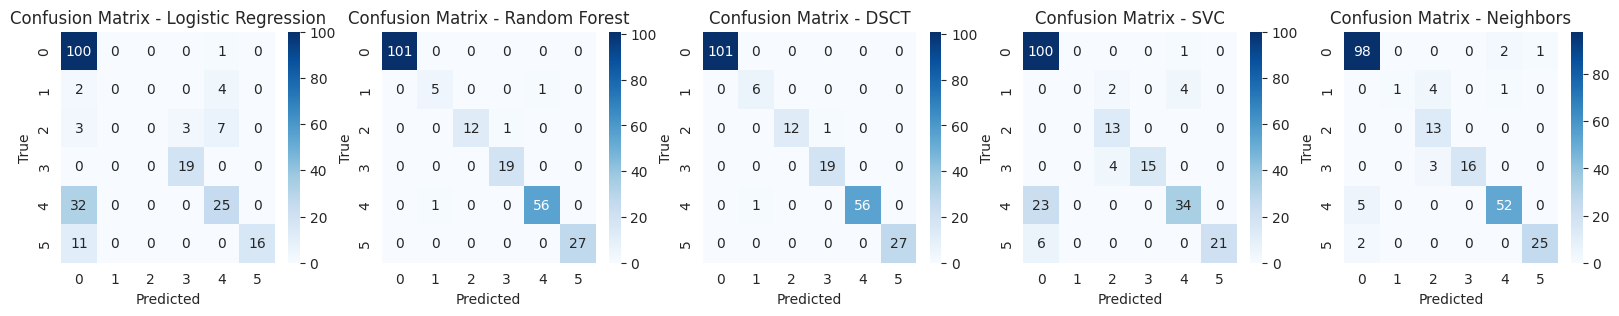

In [99]:
RLOG = confusion_matrix(y_test, model_pred_L)
RMFC = confusion_matrix(y_test, model_pred_R)
DSCT = confusion_matrix(y_test, model_pred_T)
SVC_ = confusion_matrix(y_test, model_SVC_Pred)
NEG = confusion_matrix(y_test, model_NEG_Pred)

fig, axes = plt.subplots(1, 5, figsize=(20, 3))

sns.heatmap(RLOG, annot=True, cmap='Blues', fmt='g', ax=axes[0])
axes[0].set_title('Confusion Matrix - Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

sns.heatmap(RMFC, annot=True, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix - Random Forest')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

sns.heatmap(DSCT, annot=True, cmap='Blues', fmt='g', ax=axes[2])
axes[2].set_title('Confusion Matrix - DSCT')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('True')

sns.heatmap(SVC_, annot=True, cmap='Blues', fmt='g', ax=axes[3])
axes[3].set_title('Confusion Matrix - SVC')
axes[3].set_xlabel('Predicted')
axes[3].set_ylabel('True')

sns.heatmap(NEG, annot=True, cmap='Blues', fmt='g', ax=axes[4])
axes[4].set_title('Confusion Matrix - Neighbors')
axes[4].set_xlabel('Predicted')
axes[4].set_ylabel('True')

print(y_test.value_counts())
plt.show()

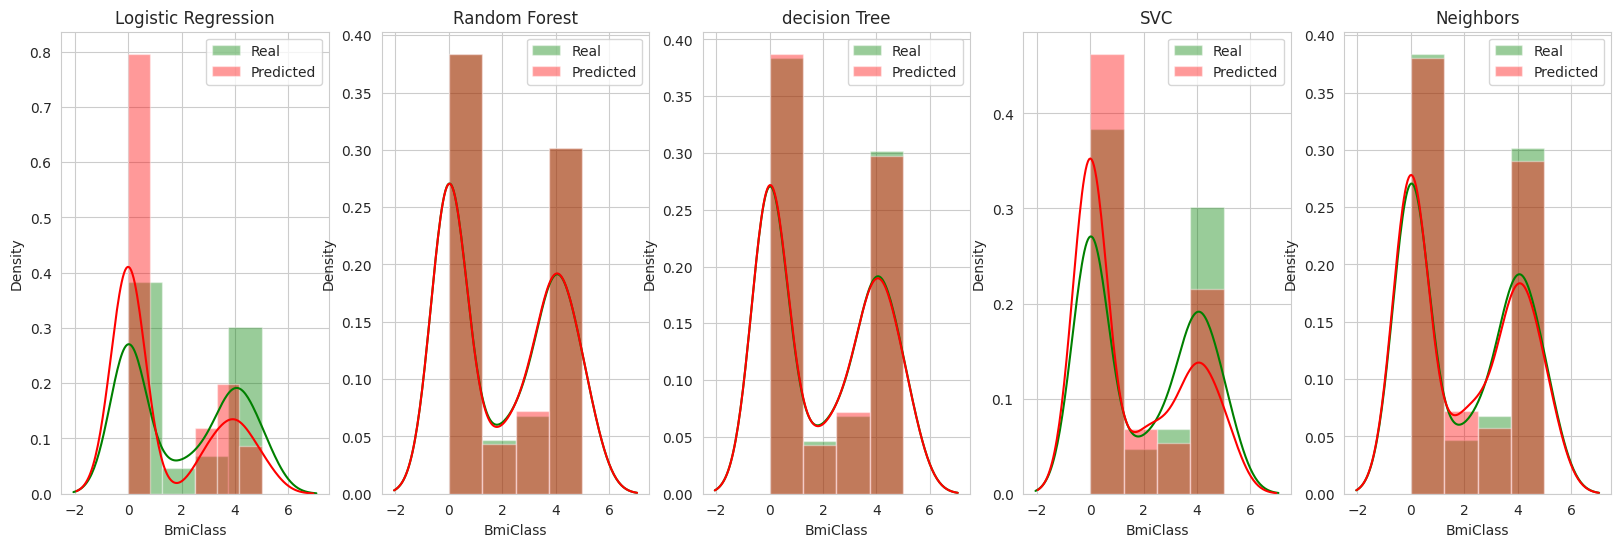

In [101]:
fig, ax = plt.subplots(1, 5, figsize=(20, 6))

sns.distplot(y_test, label='Real', ax=ax[0], color = 'Green')
sns.distplot(model_pred_L, label='Predicted', ax=ax[0],  color = 'red')

sns.distplot(y_test, label='Real', ax=ax[1], color = 'Green')
sns.distplot(model_pred_R, label='Predicted', ax=ax[1], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[2], color = 'Green')
sns.distplot(model_pred_T, label='Predicted', ax=ax[2], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[3], color = 'Green')
sns.distplot(model_SVC_Pred, label='Predicted', ax=ax[3], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[4], color = 'Green')
sns.distplot(model_NEG_Pred, label='Predicted', ax=ax[4], color = 'red')


ax[0].set_title('Logistic Regression')
ax[1].set_title('Random Forest')
ax[2].set_title('decision Tree')
ax[3].set_title('SVC')
ax[4].set_title('Neighbors')

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
ax[4].legend()
plt.show()